# ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3

Исследование общей вариабельности и внутренней организации сердечного ритма
_______________________________________________________________________________________________________________________________

Цель работы: освоить статистические и геометрические методы анализа вариабельности сердечного ритма. 

Устанавливаем необходимые для выполнения лабораторной работы библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

Получаем данные с кардиоинтервалами, которые необходимо будет исследовать

In [88]:
df = pd.read_csv("3_f_1.csv", delimiter=',')
dt = df.T
d

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
arr,926,914,885,874,879,894,880,897,932,944,...,868,947,962,983,965,862,867,882,886,897


1. Расчет основных параметров вариабельности: среднее значение М, среднеквадратичное отклонение SDNN, коэффициент вариации CV.
Формулы:

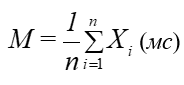
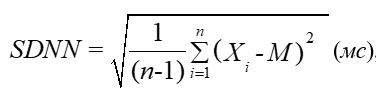
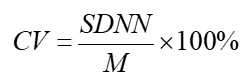

In [89]:
data = df['arr'].values
M = data.mean()
SDNN = np.std(data)
CV = (SDNN / M) * 100
print('M = ' + str(M) + ',\nSDNN = ' + str(SDNN) + ',\nCV = ' + str(CV) + '.')

M = 906.5066666666667,
SDNN = 60.71378170472409,
CV = 6.697554903592263.


2.	По заданному массиву кардиоинтервалов построим гистограмму с шагом 50 мс (0.05 с) по следующему алгоритму:

a.	динамический ряд кардиоинтервалов разбивается на k интервалов длиной dx = 50 мс;

b.	вычисляется, сколько значений кардиоинтервалов xi попало в каждый из интервалов;

c.	частота попадания в какой-либо интервал получается делением числа попаданий на общее число кардиоинтервалов n;

d.	над каждым из интервалов разбиения строится прямоугольник, высота каждого прямоугольника равна частоте, деленной на Δx.

,Histogram Description
0,"From 700ms to 750ms - 1 vls, frequency: 0.003"
1,"From 750ms to 800ms - 14 vls, frequency: 0.047"
2,"From 800ms to 850ms - 35 vls, frequency: 0.117"
3,"From 850ms to 900ms - 83 vls, frequency: 0.277"
4,"From 900ms to 950ms - 102 vls, frequency: 0.340"
5,"From 950ms to 1000ms - 48 vls, frequency: 0.160"
6,"From 1000ms to 1050ms - 14 vls, frequency: 0.047"
7,"From 1100ms to 1150ms - 3 vls, frequency: 0.010"


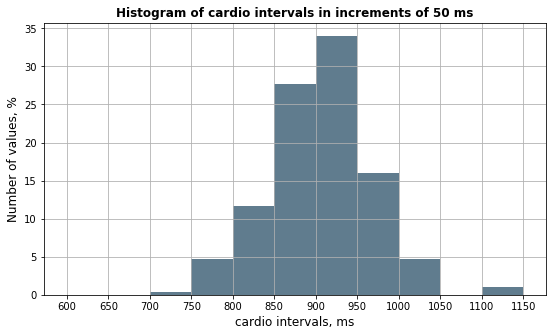

In [92]:
plt.subplots(figsize=(9, 5))
n, bins, patches = plt.hist(data, [i for i in range(600, 1200, 50)], histtype='bar', rwidth=50, color='#607c8e')
x_ticks = plt.xticks(np.arange(600, 1200, step=50))
y_ticks = plt.yticks(np.arange(0, 120, step=15), [str(i) for i in range(0, 40, 5)])
x_label = plt.xlabel('cardio intervals, ms', fontsize=12)
y_label = plt.ylabel('Number of values, %', fontsize=12)
title = plt.title('Histogram of cardio intervals in increments of 50 ms', fontweight="bold")
plt.grid()
leg = []
for i in range(len(n)):
    if n[i] != 0:
        res = "From {:.0f}ms to {:.0f}ms - {:.0f} vls, frequency: {:.3f}".format(bins[i], bins[i+1], n[i], n[i]/len(data))
        leg.append(res)
leg = pd.DataFrame(leg, columns=['Histogram Description'])
leg

In [93]:
bins

array([ 600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050, 1100,
       1150])

3. Определение моды Mo, амплитуды моды AMo, которая соответствует максимальному значению вариабельности в интервале dx=50 мс.
4. Определение вариационного размаха MxDMn.
5. Расчет индекса напряжения регуляторных систем ИН (SI).

Формулы:
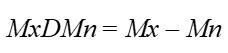
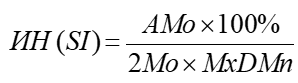

In [108]:
amp, ind = max((amp, i) for i, amp in enumerate(n))
Mo = (bins[ind] + bins[ind + 1])/2
AMo = amp/len(qty) * 100
MxDMn = len(n.nonzero()[0])*50
SI = (AMo * 100) / (2 * AMo * MxDMn)
print('Mo = ' + str(Mo) + ', AMo = ' + str(AMo) + ';\nMxDMn = ' + str(MxDMn) + ';\nSI = ' + str(SI) + '.')

Mo = 925.0, AMo = 34.0;
MxDMn = 400;
SI = 0.125.


Функция для получения массива коэффициентов корреляции, на основе которого будет построен график автокоррелограммы из задания 6.
Коэффециент корреляции получаем по формуле:
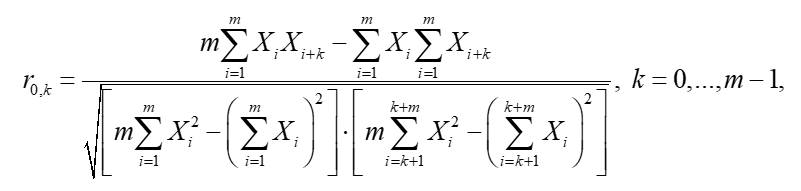

In [52]:
def coeff_r(m, qty):
    lst_rcoef = []
    for k in range(m-1):
        ik_sum, i_sum1, k_sum, sqi_sum1 = 0, 0, 0, 0
        i_sum2, sqi_sum2 = 0, 0
        for i in range(m+k):
            if i < m:
                ik_sum += qty[i] * qty[i+k]
                i_sum1 += qty[i]
                k_sum += qty[i+k]
                sqi_sum1 += qty[i] ** 2
            if i >= k+1:
                i_sum2 += qty[i]
                sqi_sum2 += qty[i] ** 2
        r = (m * ik_sum - i_sum1 * k_sum) / (((m * sqi_sum1 - i_sum1 ** 2) * (m * sqi_sum2 - i_sum2 ** 2)) ** 0.5)
        lst_rcoef.append(r)
    return lst_rcoef

6. По заданному массиву кардиоинтервалов построим график автокоррелограммы.

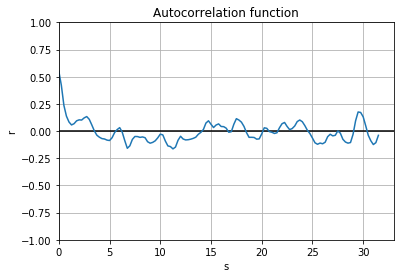

In [81]:
m = 128 #строим автокоррелограмму на основе 128 данных, как выполнено в примере, шаг также взят равным 250 мс
plt.figure()
plt.grid(True)
line = range(0, 36, 35)
plt.plot(line, [0, 0], color='black')
plt.plot([float(i * 0.25) for i in range(m - 1)], coeff_r(m, qty))
plt.xlim(0, m * 0.25 + 1)
plt.ylim(-1, 1)
plt.title("Autocorrelation function")
plt.xlabel('s')
plt.ylabel('r')
plt.show()

7. Расчет значения коэффициента корреляции после первого сдвига CC1 и числа сдвигов до первого нулевого значения коэффициента корреляции СС0.

In [84]:
r_arr = coeff_r(m, qty)
CC1 = r_arr[0]
if r_arr[0] > 0:
    k = 1
    while r_arr[k] > 0:
        k +=1
a =  (r_arr[k - 1] - r_arr[k]) / (0.25 * (k - 1) - 0.25 * k)
b = r_arr[k] - a * 0.25*k
CC0 = - (b / a)
print('CC0 = ' + str(CC0) + ",\nCC1 = " + str(CC1) + '.')

CC0 = 3.5128371052899885,
CC1 = 0.550795253676832.


Для построения корреляционной ритмограммы из задания 8, нужно для начала получить последовательности пар кардиоинтервалов по осям абсцисс и ординат, где для оси абсцисс окладывается величина 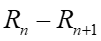 а по оси ординат - величина 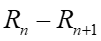

In [91]:
xR, yR = [], []
arrCor = [float(i / 1000) for i in df['arr']]
for i in range(1, len(arrCor) - 1):
    xR.append(arrCor[i-1] - arrCor[i])
    yR.append(arrCor[i] - arrCor[i+1])

xR1 = sorted(xR)
yR1 = sorted(yR)
mean = [xR1[int(len(xR1) / 2)], yR1[int(len(yR1) / 2)]]

8. Построение корреляционной ритмограммы (скаттерограммы) по заданному массиву кардиоинтервалов.

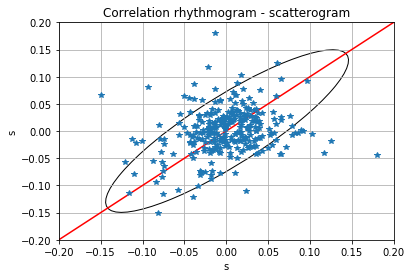

In [88]:
ell = matplotlib.patches.Ellipse(xy = mean, width = MxDMn / 1000, height = AMo / 1000, angle = 46, color='white', ec='black')
fig, ax = plt.subplots()
t = np.arange(-0.25, 0.25, 0.01)
plt.plot(t, t, color='red')
plt.grid(True)
plt.plot(xR, yR, '*')
ax.add_patch(ell)
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.title("Correlation rhythmogram - scatterogram")
plt.xlabel('s')
plt.ylabel('s')
plt.show()

Вывод:
В ходе выполнения лабораторной работы был выполнен анализ массива кардиоинтервалов. Был выполнен расчет основных параметров вариабельности кардиоинтервала; построена гистограмма с шагом 50 мс, которая отображала количество значений, которые попали в каждый из интервалов, выполняла расчет частоты попадания в любой из интервалов; на основе полученной гистограммы были расчитаны: мода и амплитуда моды, вариационный размах и значение индекса напряжения регуляторных систем; был построен график автокоррелограммы на основе массива коэффициентов корреляции, полученных от заданного массива кардинтервалов, и также на основе данного массива были получены: коэффициент корреляции после первого сдвига и число сдвигов до первого нулевого значения коэффициента корреляции; построена корреляционная ритмограмма, показывающая изменение сердечного цикла.